In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

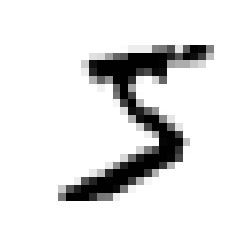

In [6]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')

In [7]:
y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

array([0.96760648, 0.96704835, 0.96754513])

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'weights': ['uniform', 'distance'],
              'n_neighbors': [5, 10, 20]}]
grid_search = GridSearchCV(knn_clf, param_grid,
                           n_jobs=3,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [15]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [16]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=5)

In [17]:
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

array([0.96880624, 0.96784839, 0.96904536])

2. SHIFTING

In [18]:
from scipy.ndimage.interpolation import shift


In [20]:
some_digit_image.shape

(28, 28)

In [21]:
28*28

784

In [25]:
some_digit_right = shift(some_digit_image, [0,1])

(-0.5, 27.5, 27.5, -0.5)

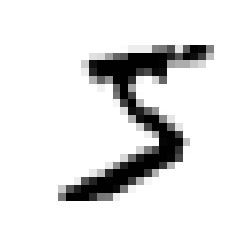

In [23]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

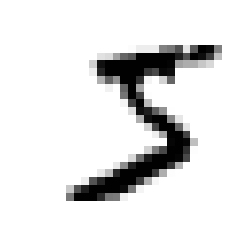

In [26]:
plt.imshow(some_digit_right, cmap='binary')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

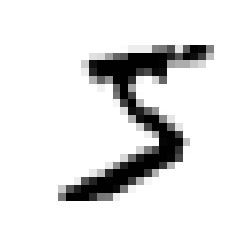

In [32]:
some_digit_left = shift(some_digit_image, [0,-10])
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')


(-0.5, 27.5, 27.5, -0.5)

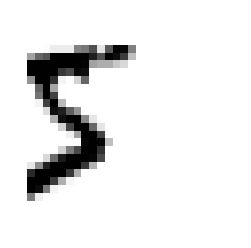

In [33]:
plt.imshow(some_digit_left, cmap='binary')
plt.axis('off')

In [45]:
reshaped = some_digit_left.reshape(784)

In [46]:
reshaped.shape

(784,)

In [52]:
def shift_image(some_image, direction='right'):
    assert some_image.shape == (28, 28), "Please reshape the image"
    shift_dict = { 'right': [0,1],
              'left':  [0,-1],
              'up':    [1,0],
              'down':  [-1,0]}
    assert direction in shift_dict.keys(), "Invalid direction"
    return shift(some_image, shift_dict[direction])

In [53]:
shifted = shift_image(some_digit_image, 'right')

(-0.5, 27.5, 27.5, -0.5)

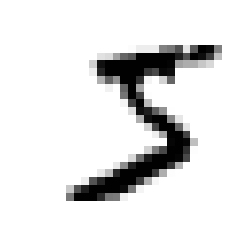

In [54]:
plt.imshow(shifted, cmap='binary')
plt.axis('off')

In [55]:
X_train.shape

(60000, 784)

In [57]:
X_train[0].shape

(784,)

In [62]:
for index, digit in enumerate(X_train[:10]):
    assert digit.shape == (784,)
    print(index)

0
1
2
3
4
5
6
7
8
9


In [68]:
X_train_expanded = X_train
y_train_expanded = y_train

In [78]:
shifted_right = shift_image(some_digit.reshape(28,28), 'right')
shifted_right.shape
reshaped = shifted_right.reshape((1,784))
reshaped.shape


(1, 784)

In [73]:
X_train_expanded.shape

(60000, 784)

In [80]:
X_train_expanded = np.append(X_train_expanded, reshaped, 0)

In [81]:
X_train_expanded.shape

(60001, 784)

In [82]:
y_train_expanded.shape

(60000,)

In [86]:
y_train_expanded = np.append(y_train_expanded, [y_train[index]], 0)

In [87]:
y_train_expanded.shape

(60001,)

In [88]:
X_train_expanded = X_train
y_train_expanded = y_train
for index, digit in enumerate(X_train):
    shifted_right = shift_image(digit.reshape(28,28), 'right')
    X_train_expanded = np.append(X_train_expanded, shifted_right.reshape((1,784)), 0)
    y_train_expanded = np.append(y_train_expanded, [y_train[index]], 0)

In [89]:
X_train_expanded.shape

(120000, 784)

In [90]:
y_train_expanded.shape

(120000,)

In [92]:
y_train[150] == y_train_expanded[150]

True

In [98]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=5)
cross_val_score(knn_clf, X_train_expanded, y_train_expanded, cv=3, scoring='accuracy', n_jobs=-1)

array([0.97312702, 0.97892553, 0.97437244])